In [ ]:
import scipy.linalg as la

# Finding roots

## Univariate roots and fixed points

In [4]:
def f(x):
    return x**3-3*x+1

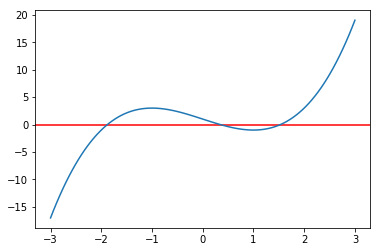

In [5]:
x = np.linspace(-3,3,100)
plt.axhline(0, c='red')
plt.plot(x, f(x))

In [6]:
from scipy.optimize import brentq, newton

brentq is the recommended method

In [7]:
brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1,3)

(-1.8793852415718166, 0.3472963553337031, 1.532088886237956)

Analytical solution using sympy to find roots of a polynomial

In [10]:
from sympy import symbols, N, real_roots

In [11]:
x = symbols('x', real=True)
sol = real_roots(x**3 - 3*x + 1)
list(map(N, sol))

[-1.87938524157182, 0.347296355333861, 1.53208888623796]

Finding fixed points

In [12]:
from scipy.optimize import fixed_point

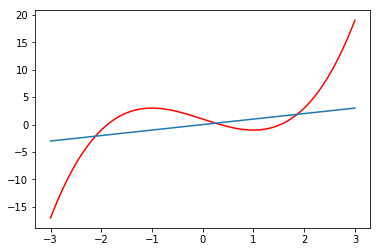

In [13]:
x = np.linspace(-3,3,100)
plt.plot(x, f(x), color='red')
plt.plot(x, x)
pass

In [14]:
fixed_point(f, 0), fixed_point(f, -3), fixed_point(f, 3)

(array(0.25410169), array(-2.11490754), array(1.86080585))

In [15]:
newton(lambda x: f(x) - x, 0), newton(lambda x: f(x) - x, -3), newton(lambda x: f(x) - x, 3)

(0.2541016883650524, -2.114907541476814, 1.8608058531117062)

In [16]:
def f(x, r):
    """Discrete logistic equation."""
    return r*x*(1-x)

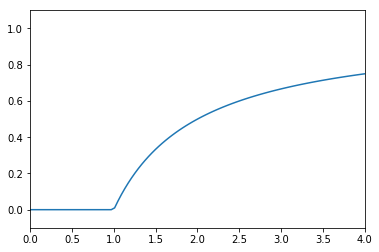

In [17]:
n = 100
fps = np.zeros(n)
for i, r in enumerate(np.linspace(0, 4, n)):
    fps[i] = fixed_point(f, 0.5, args=(r, ))

plt.plot(np.linspace(0, 4, n), fps)
plt.axis([0,4,-0.1, 1.1])
pass

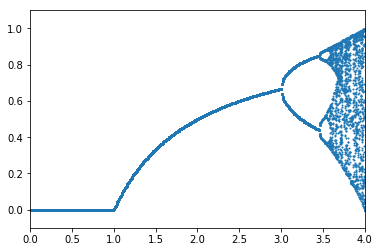

In [18]:
xs = []
for i, r in enumerate(np.linspace(0, 4, 400)):
    x = 0.5
    for j in range(10000):
        x = f(x, r)
    for j in range(50):
        x = f(x, r)
        xs.append((r, x))
xs = np.array(xs)
plt.scatter(xs[:,0], xs[:,1], s=1)
plt.axis([0,4,-0.1, 1.1])
pass

## Mutlivariate roots and fixed points

Use root to solve polynomial euqations. Use fsolve for non-polynomial equations.

In [20]:
from scipy.optimize import root, fsolve

In [21]:
def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]

In [22]:
sol = root(f, (0.5, 0.5))
sol.x

array([1.11694147, 0.82952422])

In [23]:
fsolve(f, (0.5, 0.5))

array([1.11694147, 0.82952422])

We can also give the jacobian

In [24]:
def jac(x):
    return [[-6*x[0], 1], [0.5*x[0], 2*x[1]]]

In [25]:
sol = root(f, (0.5, 0.5), jac=jac)
sol.x, sol.fun

(array([1.11694147, 0.82952422]), array([-4.23383550e-12, -3.31612515e-12]))

Check that values found are really roots

In [26]:
np.allclose(f(sol.x), 0)

True

Starting from other initial conditions, different roots may be found

In [27]:
sol = root(f, (12,12))
sol.x

array([ 0.77801314, -0.92123498])

In [28]:
np.allclose(f(sol.x), 0)

True

# Optimization Primer

Is the function convex?

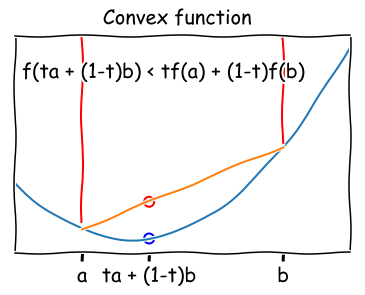

In [29]:
def f(x):
    return (x-4)**2 + x + 1

with plt.xkcd():
    x = np.linspace(0, 10, 100)

    plt.plot(x, f(x))
    ymin, ymax = plt.ylim()
    plt.axvline(2, ymin, f(2)/ymax, c='red')
    plt.axvline(8, ymin, f(8)/ymax, c='red')
    plt.scatter([4, 4], [f(4), f(2) + ((4-2)/(8-2.))*(f(8)-f(2))],
                 edgecolor=['blue', 'red'], facecolor='none', s=100, linewidth=2)
    plt.plot([2,8], [f(2), f(8)])
    plt.xticks([2,4,8], ('a', 'ta + (1-t)b', 'b'), fontsize=20)
    plt.text(0.2, 40, 'f(ta + (1-t)b) < tf(a) + (1-t)f(b)', fontsize=20)
    plt.xlim([0,10])
    plt.yticks([])
    plt.suptitle('Convex function', fontsize=20)

Warm up exercise

Show that f(x)=−log(x) is a convex function.

Checking if a function is convex using the Hessian

In [30]:
from sympy import symbols, hessian, Function, init_printing, expand, Matrix, diff
x, y, z = symbols('x y z')
f = symbols('f', cls=Function)
init_printing()

In [31]:
f = x**2 + 2*y**2 + 3*z**2 + 2*x*y + 2*x*z
f

In [32]:
H = hessian(f, (x, y, z))
H

⎡2  2  2⎤
⎢       ⎥
⎢2  4  0⎥
⎢       ⎥
⎣2  0  6⎦

In [33]:
np.real_if_close(la.eigvals(np.array(H).astype('float')))

array([0.24122952, 7.06417777, 4.69459271])

Since the matrix is symmetric and all eigenvalues are positive, the Hessian is positive defintie and the function is convex.

# Using scipy.optimize

In [35]:
from scipy import optimize as opt

In [36]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

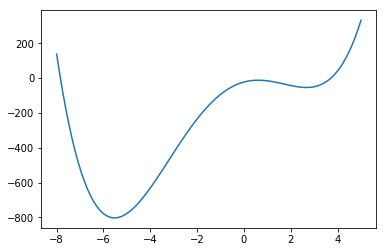

In [38]:
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x));

In [39]:
opt.minimize_scalar(f, method='Brent')

     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

In [40]:
opt.minimize_scalar(f, method='bounded', bounds=[0, 6])

     fun: -54.21003937712762
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 2.668865104039653

## Local and global minima

In [41]:
def f(x, offset):
    return -np.sinc(x-offset)

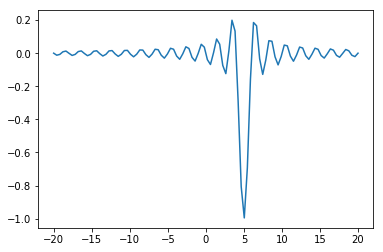

In [42]:
x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5));

In [43]:
# note how additional function arguments are passed in
sol = opt.minimize_scalar(f, args=(5,))
sol

     fun: -0.049029624014074166
    nfev: 15
     nit: 10
 success: True
       x: -1.4843871263953001

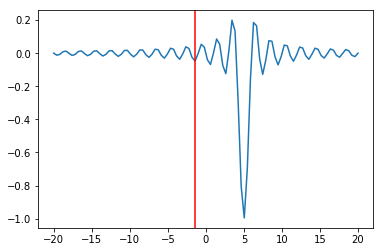

In [44]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red')
pass

We can try multiple ranodm starts to find the global minimum

In [45]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [opt.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]

In [46]:
idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]

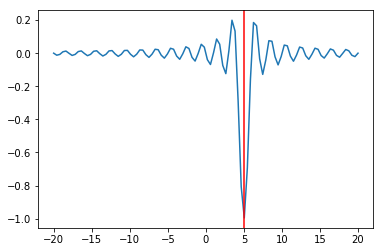

In [47]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red');

Using a stochastic algorithm

In [48]:
from scipy.optimize import basinhopping

x0 = 0
sol = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (5,)})
sol

                        fun: -1.0
 lowest_optimization_result:       fun: -1.0
 hess_inv: array([[0.3039785]])
      jac: array([1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([5.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1866
                        nit: 100
                       njev: 622
                          x: array([5.])

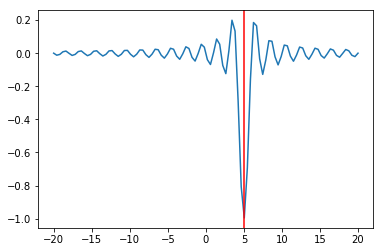

In [49]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x, c='red');

Minimizing a multivariate function

In [50]:
from sympy import symbols, hessian, Function, N

x, y = symbols('x y')
f = symbols('f', cls=Function)

f = 100*(y - x**2)**2 + (1 - x)**2

H = hessian(f, [x, y]).subs([(x,1), (y,1)])
H, N(H.condition_number())

⎛⎡802   -400⎤                  ⎞
⎜⎢          ⎥, 2508.00960127744⎟
⎝⎣-400  200 ⎦                  ⎠

In [51]:
import scipy.linalg as la

mu = la.eigvals(np.array([802, -400, -400, 200]).reshape((2,2)))
np.real_if_close(mu[0]/mu[1])

array(2508.00960128)

In [52]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

In [54]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

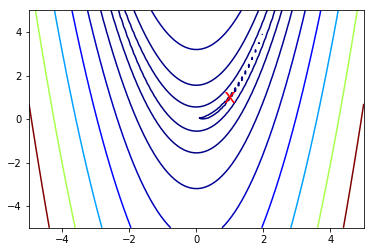

In [55]:
# Note: the global minimum is at (1,1) in a tiny contour island
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20);

Zooming in to the global minimum at (1,1)

In [56]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

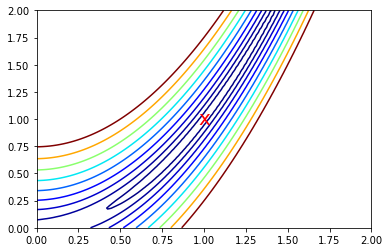

In [57]:
plt.contour(X, Y, Z, [rosen(np.array([k, k])) for k in np.linspace(1, 1.5, 10)], cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20);

# Gradient descent

In [58]:
def f(x):
    return x[0]**2 + x[1]**2

def grad(x):
    return np.array([2*x[0], 2*x[1]])

a = 0.1 # learning rate
x0 = np.array([1.0,1.0])
print('Start', x0)
for i in range(41):
    x0 -= a * grad(x0)
    if i%5 == 0:
        print(i, x0)

Start [1. 1.]
0 [0.8 0.8]
5 [0.262144 0.262144]
10 [0.08589935 0.08589935]
15 [0.0281475 0.0281475]
20 [0.00922337 0.00922337]
25 [0.00302231 0.00302231]
30 [0.00099035 0.00099035]
35 [0.00032452 0.00032452]
40 [0.00010634 0.00010634]


### Gradient descent for least squares minimization

In [59]:
def f(x, y, b):
    """Helper function."""
    return (b[0] + b[1]*x - y)

def grad(x, y, b):
    """Gradient of objective function with respect to parameters b."""
    n = len(x)
    return np.array([
            sum(f(x, y, b)),
            sum(x*f(x, y, b))
    ])

In [60]:
x, y = map(np.array, zip((0,1), (1,2), (2,3), (3,3.5), (4,6), (5,9), (6,8)))

In [61]:
a = 0.001 # learning rate
b0 = np.zeros(2)
for i in range(10000):
    b0 -= a * grad(x, y, b0)

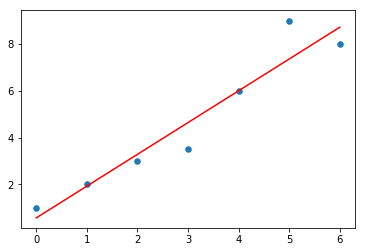

In [62]:
plt.scatter(x, y, s=30)
plt.plot(x, b0[0] + b0[1]*x, color='red')
pass

### Gradient descent to minimize the Rosen function using scipy.optimize

In [63]:
def rosen_der(x):
    """Derivative of generalized Rosen function."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [64]:
from scipy.optimize import check_grad

for x in np.random.uniform(-2,2,(10,2)):
    x0 = np.array(x)
    print(x0, check_grad(rosen, rosen_der, x0))

[ 1.70136273 -0.23232924] 4.3275959405757945e-05
[-1.96891106 -1.15013289] 7.255624449811444e-05
[-0.2142246  -0.60942121] 2.5126500695625143e-06
[-1.28053889 -0.41079116] 1.0972759901697523e-05
[0.63592394 1.82940205] 5.51840388948515e-06
[-1.22371497 -1.96428679] 9.129113979850875e-06
[ 1.8165857  -1.71737598] 7.375572014156402e-05
[-1.4055474   0.88534861] 1.4977197500917646e-05
[ 0.02388141 -1.86137082] 4.780900769255377e-06
[-1.35433711  0.30133938] 1.3749518972302068e-05


### Writing a custom function for the scipy.optimize interface.

In [66]:
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [67]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [69]:
# Initial starting position
x0 = np.array([4,-4.1])

In [70]:
ps = [x0]
opt.minimize(rosen, x0, method=custmin, callback=reporter)

     fun: 1.060466347344834e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.9998971 , 0.99979381])

In [71]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

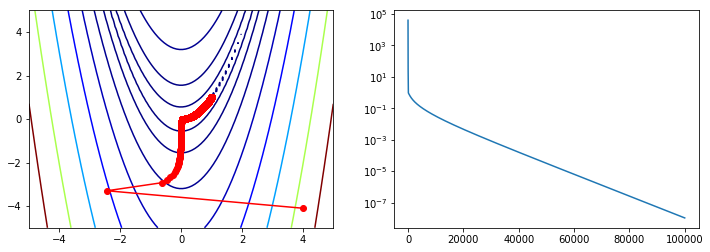

In [72]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

### Newton’s method and variants

In [73]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [74]:
ps = [x0]
opt.minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 1.3642782750354208e-13
     jac: array([ 1.21204353e-04, -6.08502470e-05])
 message: 'Optimization terminated successfully.'
    nfev: 38
    nhev: 26
     nit: 26
    njev: 63
  status: 0
 success: True
       x: array([0.99999963, 0.99999926])

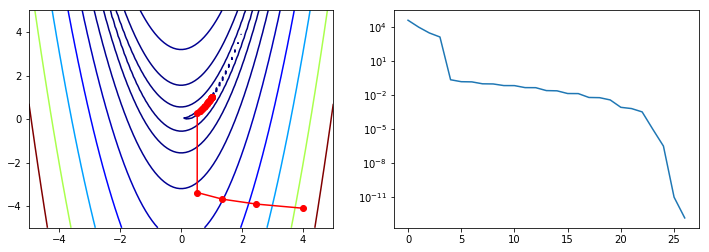

In [75]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

Frist order methods

In [76]:
ps = [x0]
opt.minimize(rosen, x0, method='BFGS', callback=reporter)

      fun: 4.4101876143268287e-13
 hess_inv: array([[0.49999063, 1.0000786 ],
       [1.0000786 , 2.00533179]])
      jac: array([ 1.56197299e-05, -3.93816939e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 588
      nit: 54
     njev: 144
   status: 2
  success: False
        x: array([0.99999939, 0.99999876])

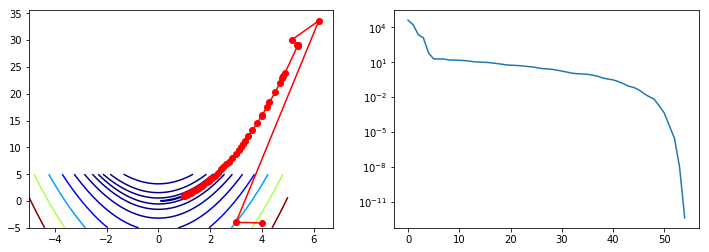

In [79]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

Zeroth order methods

In [80]:
ps = [x0]
opt.minimize(rosen, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[0.99998846, 0.99997494],
       [0.99994401, 0.99989075],
       [1.0000023 , 1.0000149 ]]), array([5.26275688e-10, 3.87529507e-09, 1.06085894e-08]))
           fun: 5.262756878429089e-10
       message: 'Optimization terminated successfully.'
          nfev: 162
           nit: 85
        status: 0
       success: True
             x: array([0.99998846, 0.99997494])

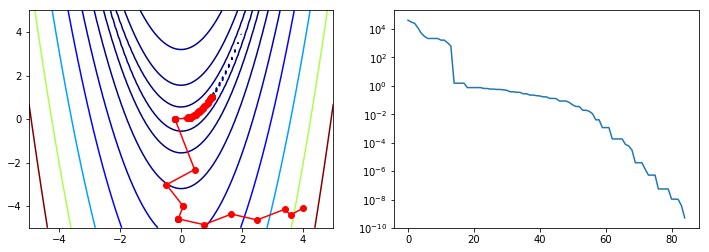

In [81]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

# Lagrange multipliers and constrained optimization

In [82]:
A = np.array([
    [0, 1, 0, -1, -1],
    [1, 0, 1, -2, 0],
    [0, 1, 0, 0, 3],
    [1, 2, 0, 0, 0],
    [1, 0,-3, 0, 0]])

b = np.array([0,0,0,6,0])

sol = la.solve(A, b)

In [83]:
sol

array([ 3. ,  1.5,  1. ,  2. , -0.5])

In [84]:
def f(x, y, z):
    return x*y + y*z

In [85]:
f(*sol[:3])

Check using scipy.optimize

In [87]:
# Convert to minimization problem by negating function
def f(x):
    return -(x[0]*x[1] + x[1]*x[2])

In [88]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0] + 2*x[1] - 6, x[0] - 3*x[2]])})

In [89]:
x0 = np.array([2,2,0.67])
cx = opt.minimize(f, x0, constraints=cons)
cx

     fun: -5.999999999999969
     jac: array([-1.50000012, -3.9999997 , -1.50000012])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([2.99999979, 1.50000011, 0.99999993])

Another example of constrained optimization

In [90]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

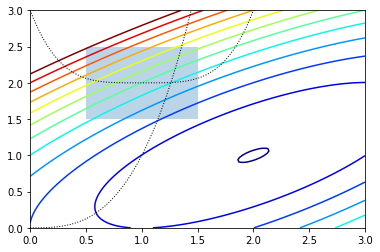

In [91]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])

In [92]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [96]:
x0 = [0, 2.5]

Unconstrained optimization

In [93]:
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -1.9999999999999925
 hess_inv: array([[0.98324219, 0.49060595, 0.        ],
       [0.49060595, 0.49472888, 0.        ],
       [0.        , 0.        , 1.        ]])
      jac: array([-2.98023224e-08, -2.98023224e-08,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 35
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.99999988, 0.99999993, 0.67      ])

Constrained optimization

In [97]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: 2.049915472024102
     jac: array([-3.48747933,  5.49674535])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

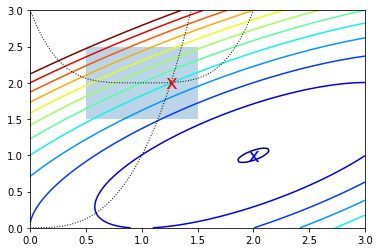

In [98]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);